<a href="https://colab.research.google.com/github/ACOELHO1976/Analise_Exploratoria/blob/main/mvpAnalisededados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MVP ANÁLISE DE DADOS E BOAS PRÁTICAS**

Notebook criado exclusivamente para o MVP da disciplina de Análise de Dados

**Aluno**: Alex Joaquim Coelho

**Dataset**: Microdados do Censo Escolar da Educação Básica 2024 (INEP)

**Onde encontrar o Dataset original**: https://download.inep.gov.br/dados_abertos/microdados_censo_escolar_2024.zip
**Onde encontrar o Dataset usado aqui**: https://github.com/ACOELHO1976/Analise_Exploratoria

**Algumas observações**:
Tanto o arquivo CVS, quanto arquivos que ajudam a complemetar e entender mais do trabalho podem ser encontrados no endereço

## **Dificuldade encontrada**
O arquivo original é muito grande e com muitas colunas, mas muito rico em informações, e com uma boa quantidade de dados para análise. Diante disso, o arquivo a ser tratado nesse MVP (disponível no GitHub) é um "corte" do original, tanto em colunas quanto em dados.

**O Problema**

Encontrar uma relação entre escolas da rede pública e privada, para tentar analisar as condições de infraestrutura dos locais, bem como a quantidade de pessoas matrículadas, idade, raça e gênero.

**Hipóteses do problema**

Algumas das hipóteses levantas foram:

*   Quantidade de escolas por tipo de dependência, por estado.
*   Quantidade de escolas conforme sua localidade (zona urbana e rural), de acordo com a dependência.
*   Rancking dos 10 municípios com mais escolas no sudeste.
*   Quantidade de escolas conforme sua localidade.
*   Média de alunos por escola - estado, localização e dependência.
*   Quantidade de escolas com banheiro e que possuem banheiro PNE.
*   Quantidade de alunos matrículados por faixa etária.
*   Relação das escolas que tem cozinha e servem refeição.
*   Escolas com educação indígena, conforme os tipos de línguas ensinadas.

**Seleção dos dados**

Apesar de se tratar de um arquivo com informações do Brasil, o recorte foi feito para mostrar dados da região Sudeste (São Paulo, Rio de Janeiro, Minas Gerais e Espírito Santo).

**Atributos do Dataset**
**Onde encontrar um dicionário de dados mais detalhado**: https://github.com/ACOELHO1976/Analise_Exploratoria

1.  NU_ANO_CENSO (númerico de tamanha 4, apresenta o ano da pesquisa)
2.  NO_UF (caracter de tamanho 50, contém os estados do sudeste)
3.  SG_UF (caracter de tamanho 2, contém a sigla do estado)
4.  NO_MUNICIPIO (caracter de tamanho 150, contém o nome da cidade da escola)
5.  NO_ENTIDADE (caracter de tamanho 100, contém o nome da isntituição de ensino)
6.  TP_DEPENDENCIA (numérico de tamanho 1, classificada em 1 - Federal, 2 - Estadual, 3 - Municipal e 4 - Privada)
7.  TP_LOCALIZACAO (numérico de tamanho 1, classificada em 1 - Urbana e 2 - Rural)
8.  TP_SITUACAO_FUNCIONAMENTO (numérico de tamanho 1, classificada em 1 - Em Atividade, 2 - Paralisada, 3 - Extinta (ano do Censo) e 4 - Extinta em Anos Anteriores)
9.  IN_LOCAL_FUNC_UNID_PRISIONAL (caracter de tamanho 1, diz se a escola funciona dentro de presídio ou não)
10. IN_AGUA-POTAVEL (numérico de tamanho 1, diz se a escola possui água potável)
11. IN_AGUA_REDE_PUBLICA (numérico de tamanho 1, diz se a escola tem fornecimento de água da rede pública)
12. IN_AGUA_INEXISTENTE (numérico de tamanho 1, diz se a escola tem algum fornecimento de água)
13. IN_ENERGIA_REDE_PUBLICA (numérico de tamanho 1, diz se a escola tem fornecimento de energia da rede pública)
14. IN_ENERGIA_RENOVAVEL (numérico de tamanho 1, diz se a escola possui energia renovável)
15. IN_ENERGIA_INEXISTENTE (numérico de tamanho 1, diz se a escola possui energia)
16. IN_ESGOTO_REDE_PUBLICA (numérico de tamanho 1, diz se a escola tem esgoto da rede pública)
17. IN_ESGOTO_INEXISTENTE (numérico de tamanho 1, diz se a escola não tem esgoto)
18. IN_BANHEIRO (numérico de tamanho 1, diz se a escola tem banheiro)
19. IN_BANHEIRO_PNE (numérico de tamanho 1, diz se a escola tem banheiro do tipo PNE)
20. QT_SALAS_EXISTENTES * numérico de tamanho 4, mostra a quantidade de salas de aula)
21. IN_INTERNET (numérico de tamanho 1, diz se na escola existe Internet)
22. IN_INTERNET_ALUNOS (numérico de tamanho 1, diz se na escola a Internet é usada por alunos)
23. IN_ALIMENTACAO (numérico de tamanho 1, diz se a escola oferece alimentação)
24. QT_MAT_BAS (numérico de tamanho 8, diz a quantidade de matrículas na educação básica)
25. QT_MAT_FUND (numérico de tamanho 8, diz a quantidade de matrículas


## **Importação do arquivo**

In [138]:
# Importação de bibliotecas e carga do arquivo CSV
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Carregar o arquivo CSV com codificação apropriada e delimitador correto
educ = pd.read_csv('https://github.com/ACOELHO1976/Analise_Exploratoria/raw/refs/heads/main/educacao_2024_corte.csv', delimiter=';', encoding='latin1', low_memory=False)
educ.head()


,NU_ANO_CENSO,NO_REGIAO,NO_UF,SG_UF,NO_MUNICIPIO,NO_ENTIDADE,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_SITUACAO_FUNCIONAMENTO,IN_LOCAL_FUNC_UNID_PRISIONAL,...,QT_MAT_BAS_18_MAIS,QT_DOC_BAS,QT_DOC_FUND,QT_DOC_MED,QT_DOC_PROF,QT_DOC_PROF_TEC,QT_DOC_EJA,QT_DOC_EJA_FUND,QT_DOC_EJA_MED,QT_DOC_ESP
0,2024,Sudeste,Minas Gerais,MG,Abadia dos Dourados,EM DE PALMITOS,3,2,1,0.0,...,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024,Sudeste,Minas Gerais,MG,Abadia dos Dourados,EE PEDRO ALVARES CABRAL,2,1,1,0.0,...,28.0,28.0,21.0,18.0,0.0,0.0,0.0,0.0,0.0,23.0
2,2024,Sudeste,Minas Gerais,MG,Abadia dos Dourados,EM EDMUNDO ANTONIO PEREIRA,3,2,1,0.0,...,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024,Sudeste,Minas Gerais,MG,Abadia dos Dourados,EM HEITOR JOSE DE OLIVEIRA,3,2,1,0.0,...,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,Sudeste,Minas Gerais,MG,Abadia dos Dourados,APAE ESC CRESCER,4,1,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Analisando os dados existentes**

O Dataset possui 74973 instâncias por 64 colunas, sendo 5 atributos do tipo categórico, utilizados para determinar locais, escolas, e outros.

Entre esses dados categóricos, destancam-se objetos e a quantidade de repetições. Como o arquivo foi cortado apenas para a região sudeste, já verificamos a existência de apenas essa informação para o atributo NO_REGIAO, e a quantidade 4 para NO_UF (estados), confirmando a existência de apenas dados do sudeste, mas também já é possível verificar que "São Paulo" é o que mais aparece em NO_MUNICIPIO (município). Enquanto que em NO_ENTIDADE (escolas) a que mais se repete é "EM DE ENSINO FUNDAMENTAL - ANOS INICIAIS".

In [34]:
print("Matriz de linhas x coluna:", educ.shape)
print()
print("Lista das colunas")
print(educ.columns.tolist())
print()
print(f"Análise por categoria das colunas")
print(educ.describe(include='object'))
print()
# Informações das colunas e tipos de dados
print(f"Total de instâncias: {len(educ)}")
print(educ.info())

#Preparação para análise da conferência de nulos e padronização


Matriz de linhas x coluna: (74973, 64)

Lista das colunas
['NU_ANO_CENSO', 'NO_REGIAO', 'NO_UF', 'SG_UF', 'NO_MUNICIPIO', 'NO_ENTIDADE', 'TP_DEPENDENCIA', 'TP_LOCALIZACAO', 'TP_SITUACAO_FUNCIONAMENTO', 'IN_LOCAL_FUNC_UNID_PRISIONAL', 'IN_AGUA_POTAVEL', 'IN_AGUA_REDE_PUBLICA', 'IN_AGUA_INEXISTENTE', 'IN_ENERGIA_REDE_PUBLICA', 'IN_ENERGIA_RENOVAVEL', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_REDE_PUBLICA', 'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_BANHEIRO_PNE', 'IN_COZINHA', 'IN_REFEITORIO', 'QT_SALAS_UTILIZADAS_DENTRO', 'QT_SALAS_UTILIZADAS_FORA', 'QT_SALAS_UTILIZADAS', 'IN_INTERNET', 'IN_INTERNET_ALUNOS', 'TP_REDE_LOCAL', 'IN_ALIMENTACAO', 'IN_EDUCACAO_INDIGENA', 'TP_INDIGENA_LINGUA', 'QT_MAT_BAS', 'QT_MAT_FUND', 'QT_MAT_MED', 'QT_MAT_PROF', 'QT_MAT_PROF_TEC', 'QT_MAT_EJA', 'QT_MAT_EJA_FUND', 'QT_MAT_EJA_MED', 'QT_MAT_EJA_MED_TEC', 'QT_MAT_ESP', 'QT_MAT_BAS_FEM', 'QT_MAT_BAS_MASC', 'QT_MAT_BAS_ND', 'QT_MAT_BAS_BRANCA', 'QT_MAT_BAS_PRETA', 'QT_MAT_BAS_PARDA', 'QT_MAT_BAS_AMARELA', 'QT_MAT

**Mais algumas informações**

Soma as dependências e localização.

Quantidade de nulos encontrados.

In [35]:
# Estatísticas descritivas
Totais = educ.groupby('NO_UF').agg({'TP_DEPENDENCIA': ['mean', 'sum'], 'TP_LOCALIZACAO': ['mean', 'sum']}).reset_index()

Totais

NO_UF TP_DEPENDENCIA         TP_LOCALIZACAO       
                            mean     sum           mean    sum
0  Espírito Santo       3.015113   11970       1.358942   5395
1    Minas Gerais       3.095045   74083       1.293951  30972
2  Rio de Janeiro       3.282187   43338       1.133369  14965
3       São Paulo       3.198092  108297       1.045979  35420

In [36]:
#Verificando a existência de dados nulos
if educ.isnull().values.any():
    print("Existem dados nulos no arquivo.")
    print(educ.isnull().sum())  # Mostra a quantidade de nulos por coluna
else:
    print("Não há dados nulos no arquivo.")



Existem dados nulos no arquivo.
NU_ANO_CENSO           0
NO_REGIAO              0
NO_UF                  0
SG_UF                  0
NO_MUNICIPIO           0
                   ...  
QT_DOC_PROF_TEC    14333
QT_DOC_EJA         14333
QT_DOC_EJA_FUND    14333
QT_DOC_EJA_MED     14333
QT_DOC_ESP         14333
Length: 64, dtype: int64


## **Quantidade de escolas por tipo de dependência, por estado.**

Mensurar como está a quantidade de escolas por cada tipo de dependência em cada estado da região sudeste.
Em todos os casos, as escolas municipais estão em mais quantidade, ao contrário de escolas federais.

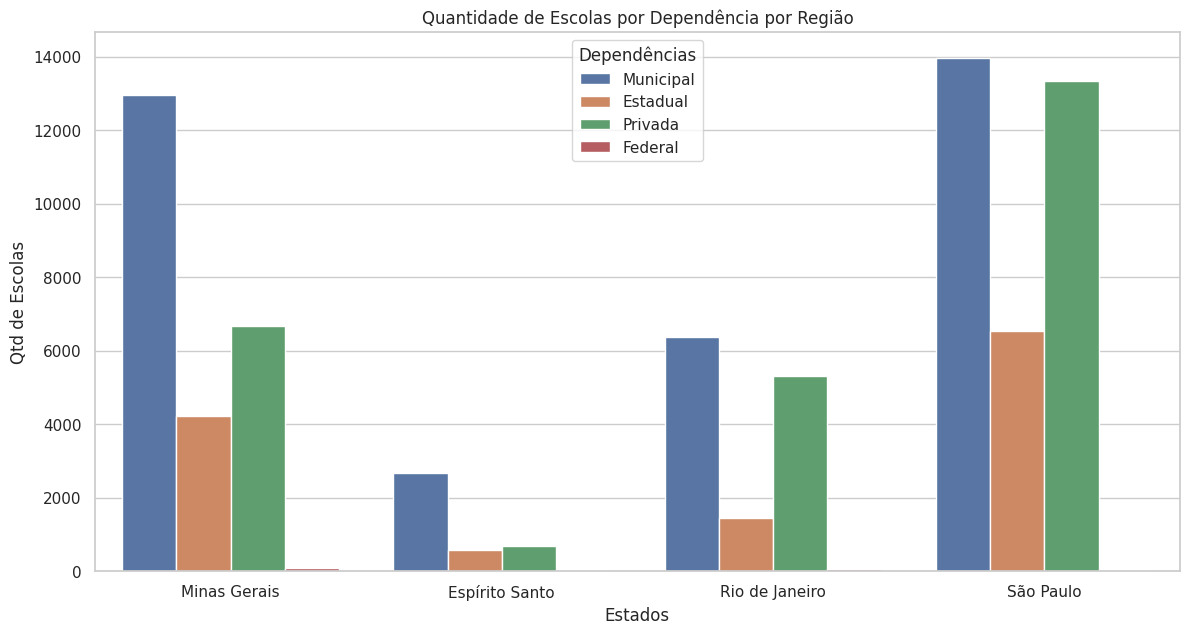

In [37]:
labels = {1: 'Federal', 2: 'Estadual', 3: 'Municipal' , 4: 'Privada'}
educ['TP_DEPENDENCIA_LABEL'] = educ['TP_DEPENDENCIA'].map(labels)
plt.figure(figsize=(14, 7))
graf = sns.countplot(x='NO_UF', hue='TP_DEPENDENCIA_LABEL', data=educ)
graf.legend(title='Dependências')
plt.title('Quantidade de Escolas por Dependência por Região')
plt.ylabel('Qtd de Escolas')
plt.xlabel('Estados')
plt.show()

## **Quantidade de escolas conforme sua localidade (zona rural ou urbana), de acordo com a dependência.**

É possível observar que na zona rural a carência de escolas é enorme, se mantendo com a maior quantidade as escolas minicipais.



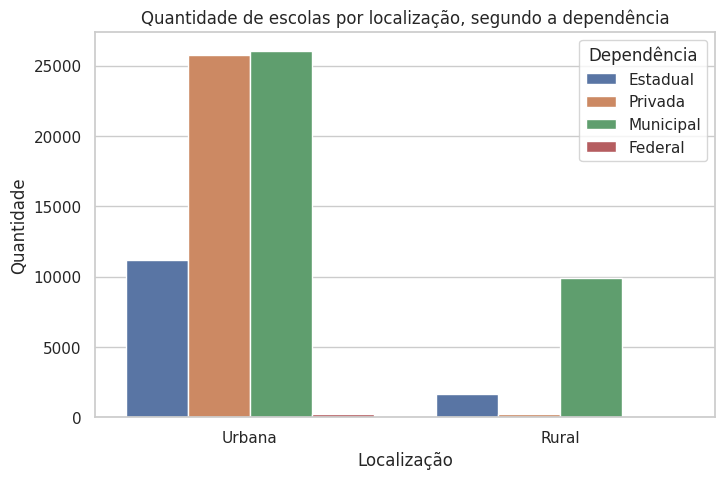

In [38]:
labels = {1: 'Federal', 2: 'Estadual', 3: 'Municipal' , 4: 'Privada'}
educ['TP_DEPENDENCIA_LABEL'] = educ['TP_DEPENDENCIA'].map(labels)
plt.figure(figsize=(8,5))
graf = sns.countplot(x='TP_LOCALIZACAO', hue='TP_DEPENDENCIA_LABEL', data=educ)
graf.legend(title='Dependência')
graf.set_xticks([0, 1])
graf.set_xticklabels(['Urbana', 'Rural'])
plt.title('Quantidade de escolas por localização, segundo a dependência')
plt.xlabel('Localização')
plt.ylabel('Quantidade')
plt.show()

## **Rancking dos 10 municípios com mais escolas no sudeste**

Considerando o rancking é visível o quanto em São Paulo o número de escolas é maior. Um possibilidade para isso pode ser a quantidade de pessoas ser também muito maior, conhecidamente.

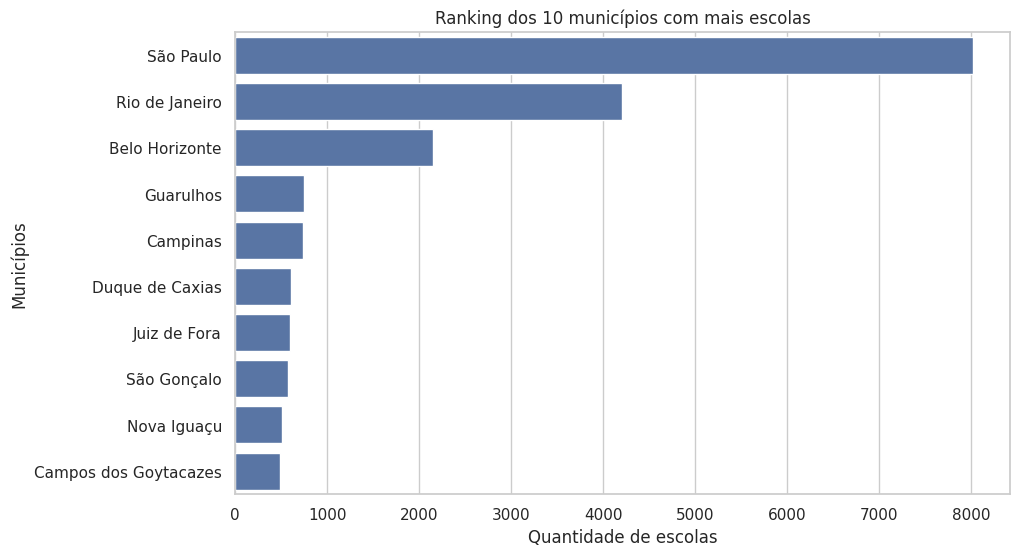

In [39]:
top_mun = educ['NO_MUNICIPIO'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_mun.values, y=top_mun.index)
plt.title('Ranking dos 10 municípios com mais escolas')
plt.xlabel('Quantidade de escolas')
plt.ylabel('Municípios')
plt.show()

## **Quantidade de escolas conforme sua localidade**

Como também era de se esperar, a quantidade total de escolas é superior.

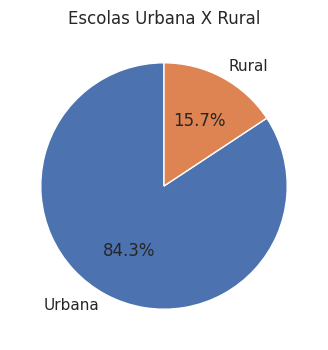

In [40]:
# C. Urban vs Rural Schools
labels = {1: 'Urbana', 2: 'Rural'}
educ['TP_LOCALIZACAO_LABEL'] = educ['TP_LOCALIZACAO'].map(labels)
plt.figure(figsize=(6,4))
educ['TP_LOCALIZACAO_LABEL'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Escolas Urbana X Rural')
plt.ylabel('')
plt.show()

##**Média de alunos por escola - estado, localização e dependência**

A ideia é mostrar a relação da quantidade de alunos matrículados.

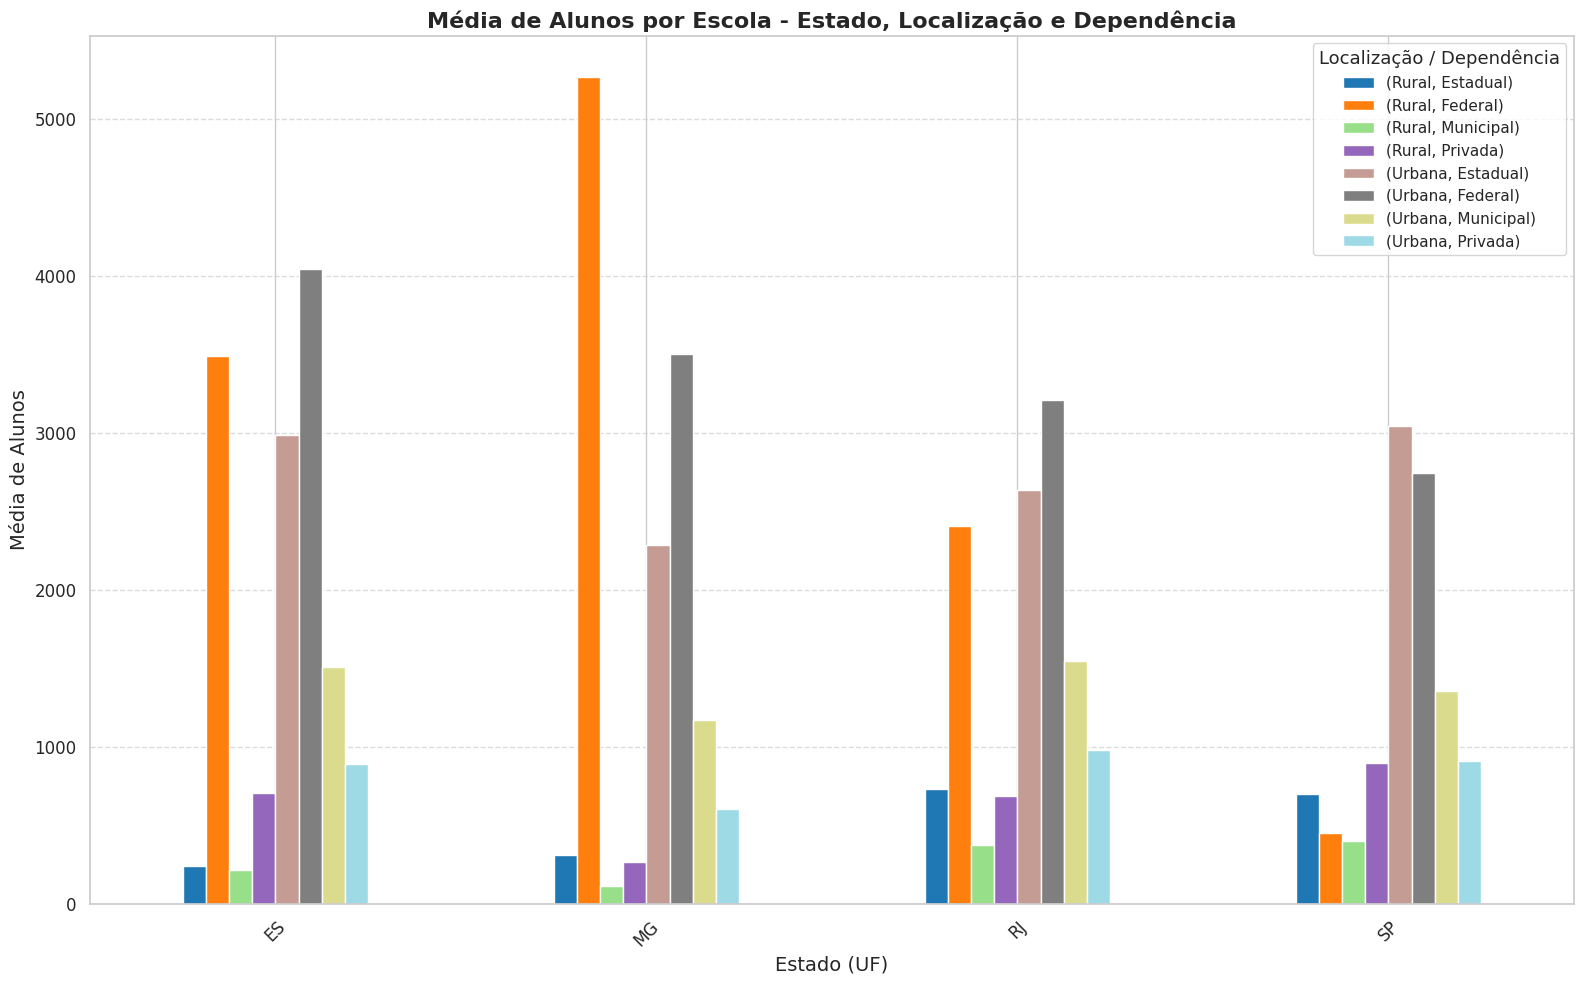

In [126]:
# Selecionar colunas de matrícula
cols_matriculas = [col for col in educ.columns if col.startswith('QT_MAT_')]

# Calcular o total de alunos por escola
educ['total_alunos'] = educ[cols_matriculas].sum(axis=1)

# Traduzir localização e dependência administrativa
educ['TP_LOCALIZACAO'] = educ['TP_LOCALIZACAO'].map({1: 'Urbana', 2: 'Rural'})
educ['TP_DEPENDENCIA'] = educ['TP_DEPENDENCIA'].map({1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'})

# Agrupar por estado, localização e dependência
media_grupo = educ.groupby(['SG_UF', 'TP_LOCALIZACAO', 'TP_DEPENDENCIA'])['total_alunos'].mean().unstack(['TP_LOCALIZACAO', 'TP_DEPENDENCIA'])

# Plotar gráfico
ax = media_grupo.plot(kind='bar', figsize=(16, 10), colormap='tab20')

plt.title('Média de Alunos por Escola - Estado, Localização e Dependência', fontsize=16, fontweight='bold')
plt.xlabel('Estado (UF)', fontsize=14)
plt.ylabel('Média de Alunos', fontsize=14)
plt.legend(title='Localização / Dependência', title_fontsize=13, fontsize=11)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##**Quantidade de escolas com banheiro e que possuem banheiro PNE.**

Aqui foi apresentado um gráfico de bolhas, referenciando novamente a maioria encontrada no estado de São Paulo, sendo o de menor expessão o Espírito Santo.
Podemos observar que a ordem segue uma relação de grandeza do estado.

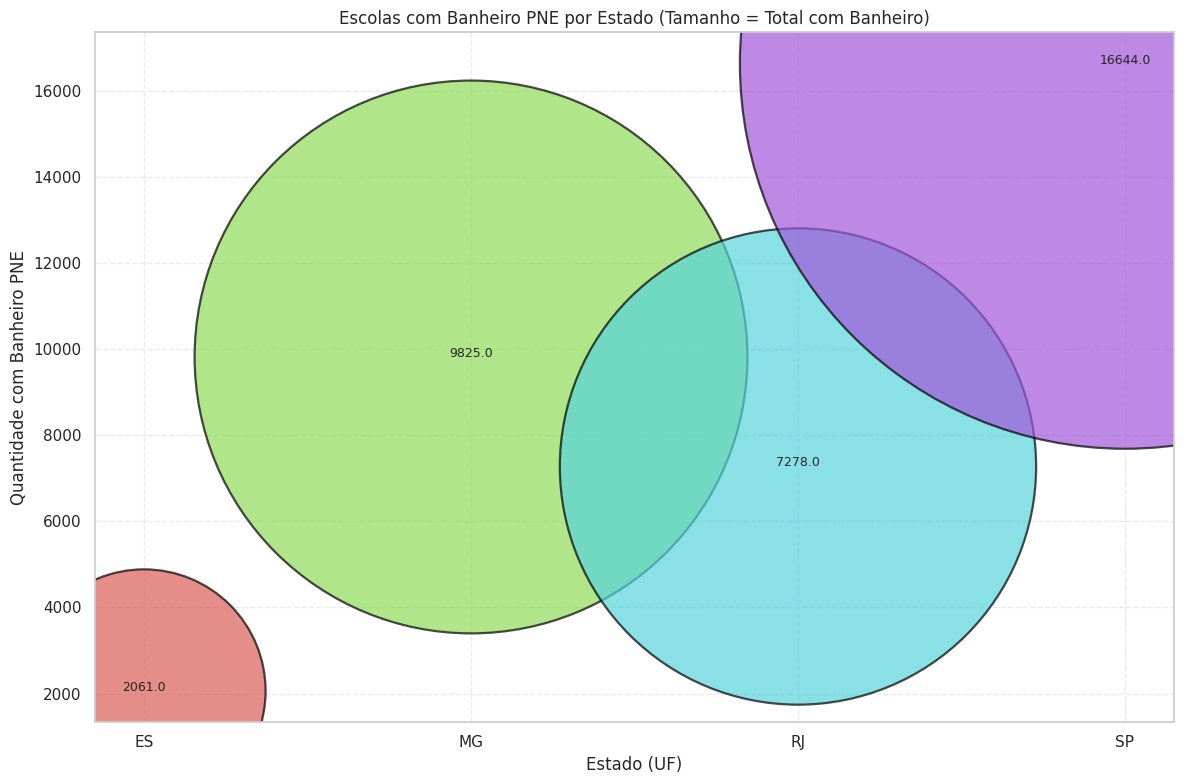

In [109]:
# Escolas com banheiro
educ_com_banheiro = educ[educ['IN_BANHEIRO'] == 1]

# Número total de escolas com banheiro e com banheiro PNE
agrupado = (educ.groupby('SG_UF').agg(Total_escolas_com_banheiro=('IN_BANHEIRO', 'count'),Escolas_com_banheiro_PNE=('IN_BANHEIRO_PNE', 'sum')).reset_index())

# Gráfico de bolhas
cores = sns.color_palette("hls", n_colors=len(agrupado))
plt.figure(figsize=(12, 8))
plt.scatter(
    agrupado['SG_UF'],
    agrupado['Escolas_com_banheiro_PNE'],
    s=agrupado['Total_escolas_com_banheiro'] * 10,
    alpha=0.7,
    c=cores,
    edgecolors='black',
    linewidth=1.6
)

# Anotações de valores
for i in range(len(agrupado)):
    plt.text(
        agrupado['SG_UF'][i],
        agrupado['Escolas_com_banheiro_PNE'][i] + 1,
        str(agrupado['Escolas_com_banheiro_PNE'][i]),
        ha='center',
        fontsize=9
    )

plt.title('Escolas com Banheiro PNE por Estado (Tamanho = Total com Banheiro)')
plt.xlabel('Estado (UF)')
plt.ylabel('Quantidade com Banheiro PNE')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##**Quantidade de alunos matrículados por faixa etária.**

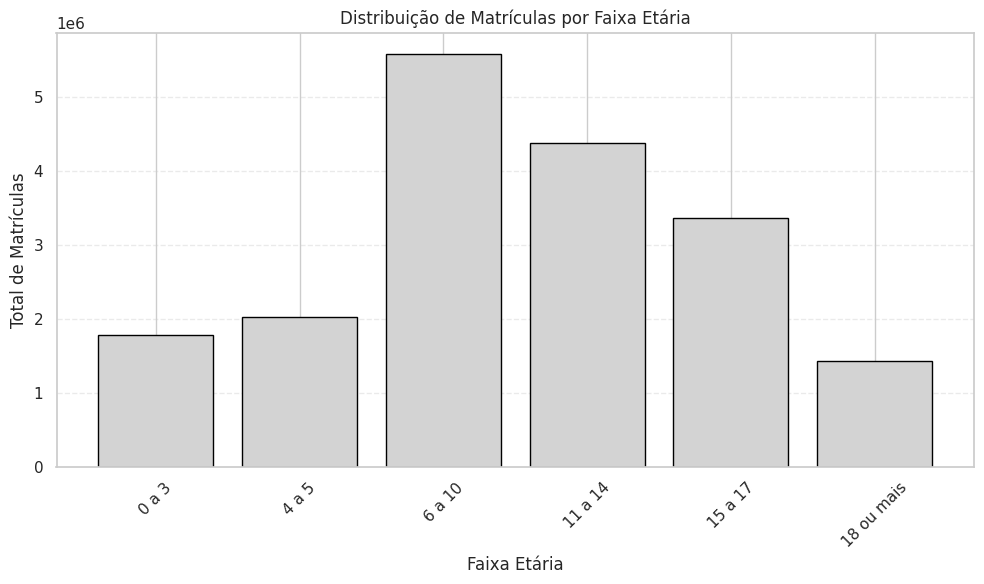

In [127]:
# Define as faixas e soma os totais
faixasIdade = {
    '0 a 3': 'QT_MAT_BAS_0_3',
    '4 a 5': 'QT_MAT_BAS_4_5',
    '6 a 10': 'QT_MAT_BAS_6_10',
    '11 a 14': 'QT_MAT_BAS_11_14',
    '15 a 17': 'QT_MAT_BAS_15_17',
    '18 ou mais': 'QT_MAT_BAS_18_MAIS'
}

histograma = {faixa: educ[coluna].sum() for faixa, coluna in faixasIdade.items()}

# Cria o gráfico
plt.figure(figsize=(10, 6))
plt.bar(histograma.keys(), histograma.values(), color='lightgray', edgecolor='black')

# Legenda e ajustes
plt.title('Distribuição de Matrículas por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Matrículas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


##**Relação das escolas que tem cozinha e servem refeição**

A ideia é mostrar quem tem cozinha e servem alimentação, tem cozinha mas não servem alimentação e não tem cozinha (independente de servir alimentação)
Esse gráfico ajuda a comparar como cada estado se organiza em relação à infraestrutura alimentar escolar.

- Quanto maior a barra verde, mais estruturado.
- Quanto mais vermelho, maior a quantidade de escolas sem cozinha.
- Já quando se tem o amarelo, há estrutura de cozinha, mas não fornece alimentação.


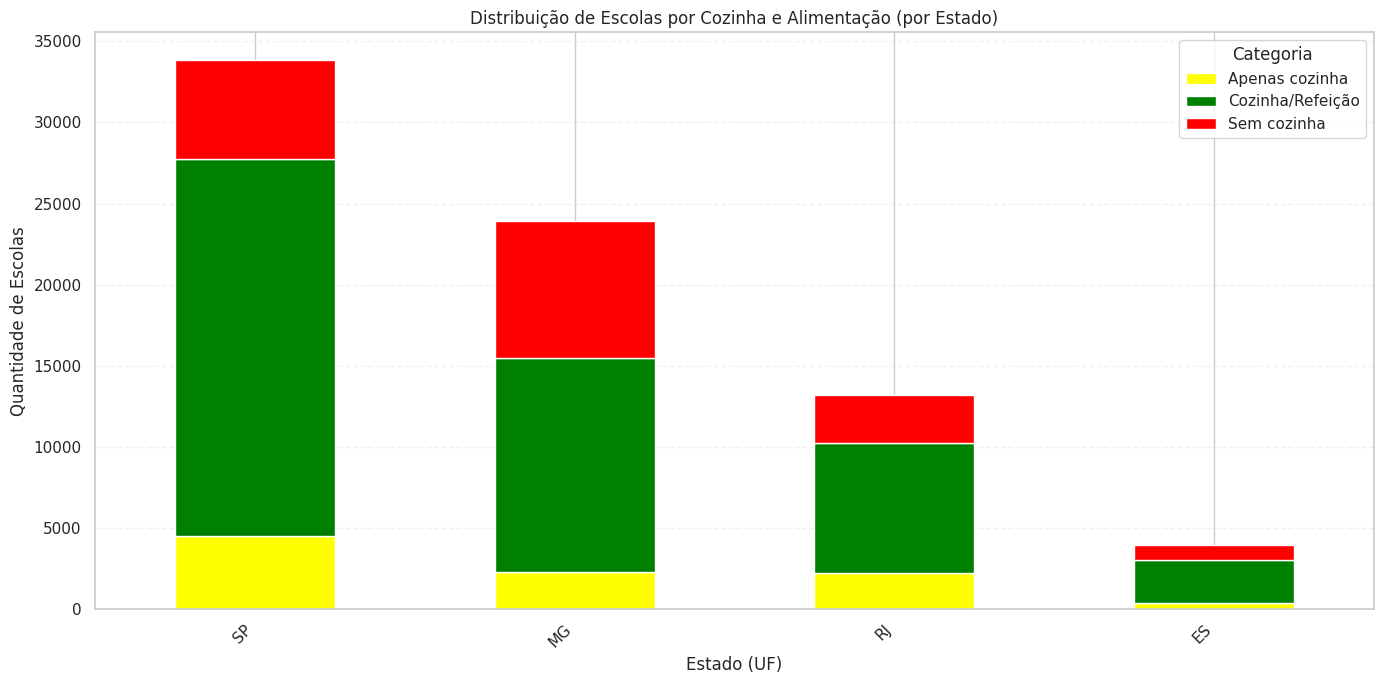

In [142]:
# Criar categorias
def classifica_escola(row):
    if row['IN_COZINHA'] == 1 and row['IN_ALIMENTACAO'] == 1:
        return 'Cozinha/Refeição'
    elif row['IN_COZINHA'] == 1 and row['IN_ALIMENTACAO'] == 0:
        return 'Apenas cozinha'
    else:
        return 'Sem cozinha'

educ['Categoria'] = educ.apply(classifica_escola, axis=1)

# Agrupando por estado e categoria
agrupaEstCat = educ.groupby(['SG_UF', 'Categoria']).size().unstack(fill_value=0)

# Ordenar por total de escolas
agrupaEstCat = agrupaEstCat.loc[agrupaEstCat.sum(axis=1).sort_values(ascending=False).index]

# Cores do gráfico
cores = {
    'Cozinha/Refeição': 'green',
    'Apenas cozinha': 'yellow',
    'Sem cozinha': 'red'
}

agrupaEstCat.plot(kind='bar', stacked=True, figsize=(14, 7), color=[cores[col] for col in agrupaEstCat.columns])

plt.title('Distribuição de Escolas por Cozinha e Alimentação (por Estado)')
plt.xlabel('Estado (UF)')
plt.ylabel('Quantidade de Escolas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoria')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##**Escolas com educação indígena, conforme os tipos de línguas ensinadas.**

Foi possível observar que na maioria das escolas, a ideia é formar pessoas bilíngues, garantindo que a língua materna seja tratada como parte da alfabetização e não apenas aprendida entre as pessoas da comunidade indígena.

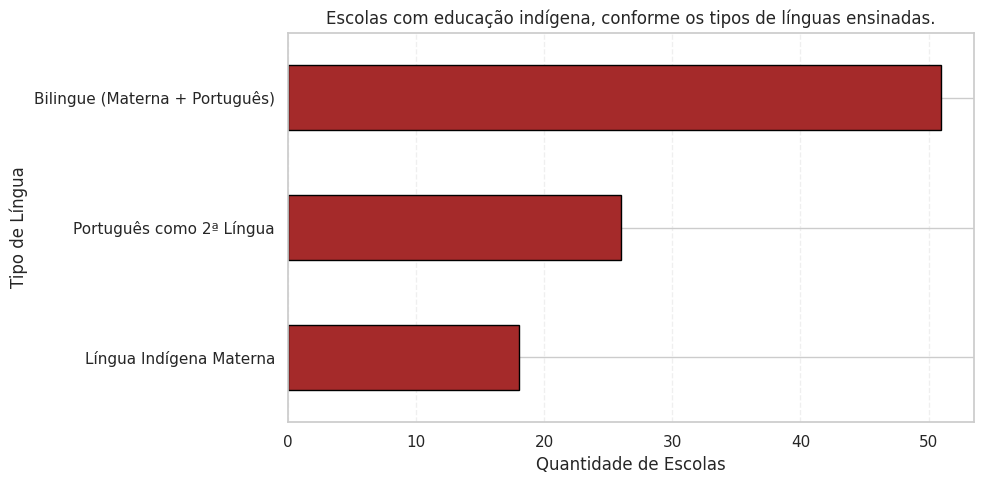

In [146]:
# Filtrar apenas escolas com educação indígena
df_indigena = educ[educ['IN_EDUCACAO_INDIGENA'] == 1]

# Atribuindo as categorias, conforme os valores encontrados
tipo_lingua = {
    1: 'Língua Indígena Materna',
    2: 'Português como 2ª Língua',
    3: 'Bilingue (Materna + Português)'
}

# Montando o Dataset com os dados para o gráfico
df_lingua = (
    df_indigena['TP_INDIGENA_LINGUA']
    .map(tipo_lingua)
    .value_counts()
    .reindex(tipo_lingua.values(), fill_value=0)
)

plt.figure(figsize=(10, 5))
df_lingua.plot(kind='barh', color='brown', edgecolor='black')

plt.title('Escolas com educação indígena, conforme os tipos de línguas ensinadas.')
plt.xlabel('Quantidade de Escolas')
plt.ylabel('Tipo de Língua')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##**Conclusão**

A análise e pré-processamento do dataset do sendo escolar de 2024 se apresentou bastante rico em informações simples e muito conclusivas. O dataset é bem estruturado, pois sas informações são todas baseadas em respostas de SIM ou NÃO, estruturadas em 0 ou 1, tornando mais fácil a análise.
Ao realizar a análise exploratória, ficou nítida que a apresentação dos dados já normalizados entre respostas simples de 0 ou 1, facilitou a análise.
Apesar de saber que as etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, o dataset escolhido não apresentou problemas como informações categorizadas ou ausências de informações que inviabilizasem as análises.
Novamente aqui trago apenas a dificuldade encontrada em se trabalhar com um dataset muito grande, por isso fo adotado um "corte", analisando apenas sobre o aspecto da região Sudeste.

De todas as hipósteses levantas, que foram todas atendidas, ficou nítido a predominância do estado de São Paulo na gerição Sudeste, muito pelo seu próprio tamanho e a necessidade de atendimento de mais pessoas. Porém, ficou também demonstrado toda a dificuldade que a zona rural tem, tanto na quantidade de escolas, não importando de quem é a competência, quanto sobre a questão de infraestrutura.